In [20]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('realistic_shoe_company_data.csv')



,product_niche,product_id,product_details,exported_date,market_share,relative_market_share,market_growth,total_qty_sold,total_sales
0,Handcrafted,SHOE001,Handcrafted Shoe Model 1,Jan-29,8.91,56.87,-3.86,2524,209022.73
1,Professional Workwear,SHOE002,Professional Workwear Shoe Model 2,Jan-07,2.12,13.55,12.64,1384,49787.88
2,Orthopedic,SHOE003,Orthopedic Shoe Model 3,Mar-12,1.72,10.96,24.45,659,40290.44
3,Professional Workwear,SHOE004,Professional Workwear Shoe Model 4,Mar-04,10.30,65.74,13.36,3585,241604.50
4,Professional Workwear,SHOE005,Professional Workwear Shoe Model 5,Feb-27,0.22,1.43,6.53,221,5241.24


In [21]:
# Group by product_niche and sum total_sales
niche_sales = df.groupby('product_niche')['total_sales'].sum().reset_index()




           product_niche  total_sales
0               Athletic    414467.13
1            Handcrafted    535734.88
2      Luxury Streetwear    225633.13
3             Orthopedic    640283.29
4  Professional Workwear    530118.23


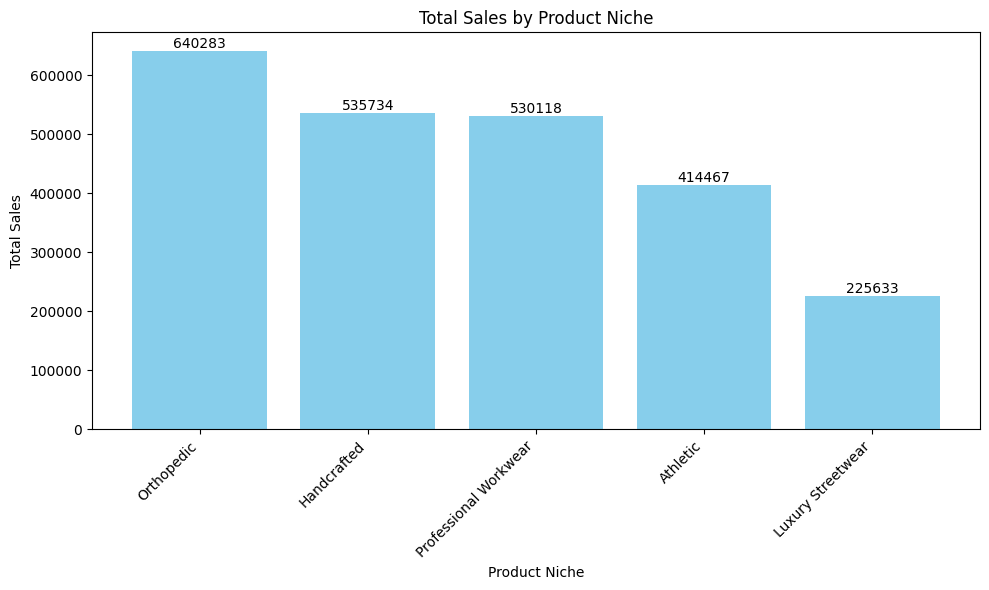

In [22]:
# display of the sales in each niche
import matplotlib.pyplot as plt

# Group by product_niche and sum total_sales
niche_sales = df.groupby('product_niche')['total_sales'].sum().reset_index()
niche_sales = niche_sales.sort_values('total_sales', ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(niche_sales['product_niche'], niche_sales['total_sales'], color='skyblue')
plt.xlabel('Product Niche')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Niche')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add sales count on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10)

In [23]:
# Group by product_niche and sum total_sales
niche_sales = df.groupby('product_details')['total_sales'].sum().reset_index()

print(niche_sales)


                        product_details  total_sales
0                Athletic Shoe Model 15    206880.11
1                Athletic Shoe Model 19     36078.05
2                 Athletic Shoe Model 6    171508.97
3              Handcrafted Shoe Model 1    209022.73
4             Handcrafted Shoe Model 11    108549.23
5             Handcrafted Shoe Model 16     87711.73
6             Handcrafted Shoe Model 20    130451.19
7       Luxury Streetwear Shoe Model 13    109947.83
8       Luxury Streetwear Shoe Model 17     70046.63
9       Luxury Streetwear Shoe Model 18     45638.67
10             Orthopedic Shoe Model 12    122369.98
11              Orthopedic Shoe Model 3     40290.44
12              Orthopedic Shoe Model 7     31858.91
13              Orthopedic Shoe Model 8     78233.61
14              Orthopedic Shoe Model 9    367530.35
15  Professional Workwear Shoe Model 10     65546.88
16  Professional Workwear Shoe Model 14    167937.73
17   Professional Workwear Shoe Model 2     49

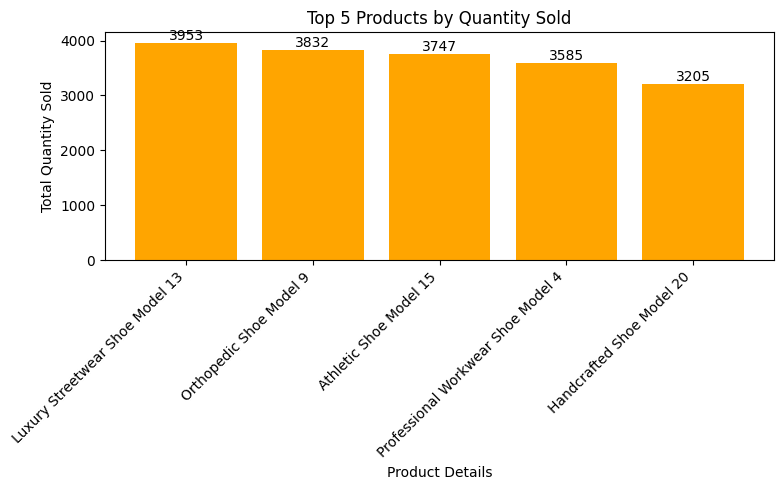

In [24]:
import matplotlib.pyplot as plt

# Find top 5 products by total quantity sold
top_products = df.groupby('product_details')['total_qty_sold'].sum().reset_index()
top_products = top_products.sort_values('total_qty_sold', ascending=False).head(5)
# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(top_products['product_details'], top_products['total_qty_sold'], color='orange')
plt.xlabel('Product Details')
plt.ylabel('Total Quantity Sold')
plt.title('Top 5 Products by Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add quantity on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10)

In [25]:
# Calculate thresholds for classification
rms_high = df['relative_market_share'].quantile(0.66)
rms_low = df['relative_market_share'].quantile(0.33)
mg_high = df['market_growth'].quantile(0.66)
mg_low = df['market_growth'].quantile(0.33)

def classify(row):
    if row['relative_market_share'] >= rms_high and row['market_growth'] >= mg_high:
        return 'High'
    elif row['relative_market_share'] <= rms_low and row['market_growth'] <= mg_low:
        return 'Poor'
    else:
        return 'Average'

df['classification'] = df.apply(classify, axis=1)

# Display the classification for each product
print(df[['product_niche', 'product_id', 'product_details', 'relative_market_share', 'market_growth', 'classification']])

            product_niche product_id                      product_details  \
0             Handcrafted    SHOE001             Handcrafted Shoe Model 1   
1   Professional Workwear    SHOE002   Professional Workwear Shoe Model 2   
2              Orthopedic    SHOE003              Orthopedic Shoe Model 3   
3   Professional Workwear    SHOE004   Professional Workwear Shoe Model 4   
4   Professional Workwear    SHOE005   Professional Workwear Shoe Model 5   
5                Athletic    SHOE006                Athletic Shoe Model 6   
6              Orthopedic    SHOE007              Orthopedic Shoe Model 7   
7              Orthopedic    SHOE008              Orthopedic Shoe Model 8   
8              Orthopedic    SHOE009              Orthopedic Shoe Model 9   
9   Professional Workwear    SHOE010  Professional Workwear Shoe Model 10   
10            Handcrafted    SHOE011            Handcrafted Shoe Model 11   
11             Orthopedic    SHOE012             Orthopedic Shoe Model 12   